# BASIC EDA (EXPLORATORY DATA ANALYSIS)
1. Handling Null Values
2. Handling Outliers
3. Handling Skewness
4. Handling Categorical Data
5. Data Normalisation and Scaling
6. Feature Engineering

In [96]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings
warnings.filterwarnings('ignore')

In [97]:
cars = pd.read_csv("cars.csv")

In [98]:
cars.head(5)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [99]:
cars.tail(5)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470
204,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,19,25,22625


In [100]:
cars.shape

(205, 15)

In [101]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [102]:
cars.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [103]:
# Step 1 -> Check for Null Values (compulsory)
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<Axes: >

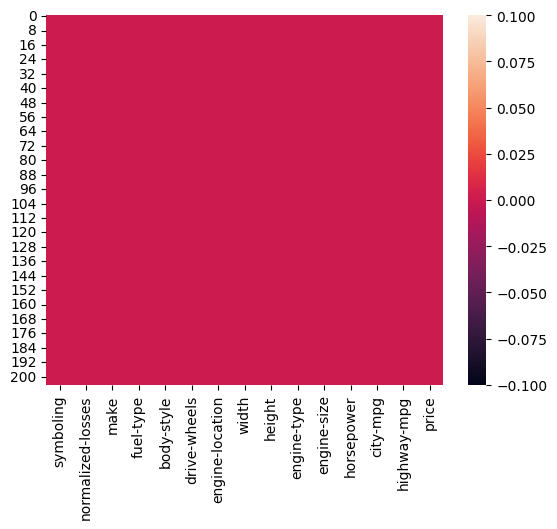

In [104]:
# Visualisation of Null Values
sns.heatmap(cars.isnull())

In [105]:
# Check Datatypes
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [106]:
cars['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [107]:
cars['normalized-losses'].value_counts()

normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

In [108]:
cars['normalized-losses'].replace("?",np.nan,inplace=True)

In [109]:
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [110]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [111]:
cars['normalized-losses'] = cars['normalized-losses'].astype('float')
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

<Axes: >

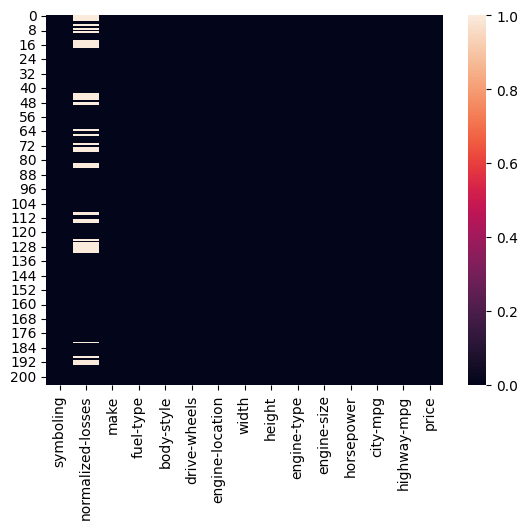

In [112]:
sns.heatmap(cars.isnull())

In [113]:
cars.isnull().sum()/cars.shape[0]*100

symboling             0.0
normalized-losses    20.0
make                  0.0
fuel-type             0.0
body-style            0.0
drive-wheels          0.0
engine-location       0.0
width                 0.0
height                0.0
engine-type           0.0
engine-size           0.0
horsepower            0.0
city-mpg              0.0
highway-mpg           0.0
price                 0.0
dtype: float64

In [114]:
mean = cars['normalized-losses'].mean()
cars['normalized-losses'].fillna(mean,inplace=True) # fillna fills all the missing values with the given value
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [115]:
cars.head(5)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [116]:
cars.tail(5)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470
204,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,19,25,22625


In [117]:
cars['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [118]:
cars['horsepower'].value_counts()

horsepower
68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: count, dtype: int64

In [119]:
cars['horsepower'].replace("?",np.nan,inplace=True)

In [120]:
cars['horsepower'] = cars['horsepower'].astype('float')

In [121]:
cars.isnull().sum()/cars.shape[0]*100

symboling            0.00000
normalized-losses    0.00000
make                 0.00000
fuel-type            0.00000
body-style           0.00000
drive-wheels         0.00000
engine-location      0.00000
width                0.00000
height               0.00000
engine-type          0.00000
engine-size          0.00000
horsepower           0.97561
city-mpg             0.00000
highway-mpg          0.00000
price                0.00000
dtype: float64

In [122]:
mean2 = cars['horsepower'].mean()
cars['horsepower'].fillna(mean2,inplace=True)
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [123]:
cars['price'].replace("?",np.nan,inplace=True)
cars['price'] = cars['price'].astype('float')

In [124]:
cars.isnull().sum()/cars.shape[0]*100

symboling            0.0
normalized-losses    0.0
make                 0.0
fuel-type            0.0
body-style           0.0
drive-wheels         0.0
engine-location      0.0
width                0.0
height               0.0
engine-type          0.0
engine-size          0.0
horsepower           0.0
city-mpg             0.0
highway-mpg          0.0
price                0.0
dtype: float64

In [125]:
mean3 = cars['price'].mean()
cars['price'].fillna(mean3,inplace=True)
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<Axes: ylabel='price'>

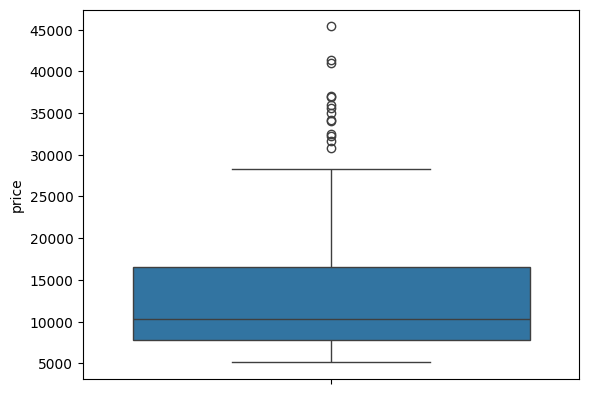

In [126]:
sns.boxplot(data=cars,y='price')

In [127]:
cars['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<Axes: xlabel='price', ylabel='make'>

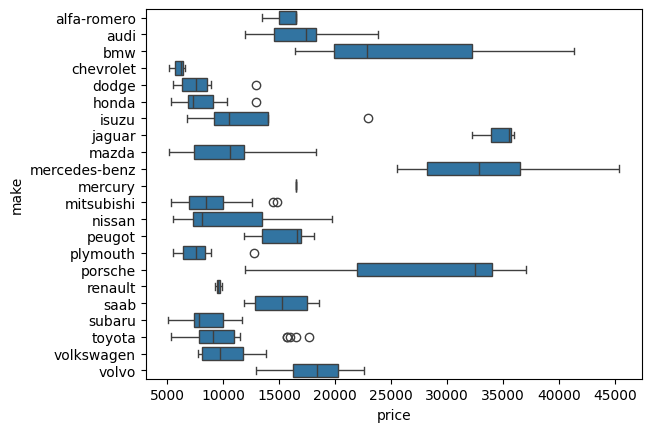

In [128]:
sns.boxplot(data=cars,x='price',y='make')

In [145]:
cars[(cars['make']=='isuzu') & (cars['price']>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000.0


In [146]:
cars[(cars['make']=='dodge') & (cars['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964.0


In [147]:
cars[(cars['make']=='honda') & (cars['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
40,0,85.0,honda,gas,sedan,fwd,front,62.5,54.1,ohc,110,86.0,27,33,10295.0
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945.0
42,1,107.0,honda,gas,sedan,fwd,front,66.0,51.0,ohc,110,100.0,25,31,10345.0


In [148]:
cars[(cars['make']=='mitsubishi') & (cars['price']<15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
76,2,161.0,mitsubishi,gas,hatchback,fwd,front,64.4,50.8,ohc,92,68.0,37,41,5389.0
77,2,161.0,mitsubishi,gas,hatchback,fwd,front,64.4,50.8,ohc,92,68.0,31,38,6189.0
78,2,161.0,mitsubishi,gas,hatchback,fwd,front,64.4,50.8,ohc,92,68.0,31,38,6669.0
79,1,161.0,mitsubishi,gas,hatchback,fwd,front,63.8,50.8,ohc,98,102.0,24,30,7689.0
80,3,153.0,mitsubishi,gas,hatchback,fwd,front,65.4,49.4,ohc,110,116.0,23,30,9959.0
81,3,153.0,mitsubishi,gas,hatchback,fwd,front,65.4,49.4,ohc,122,88.0,25,32,8499.0
82,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12629.0
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869.0
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489.0
85,1,125.0,mitsubishi,gas,sedan,fwd,front,65.4,51.6,ohc,122,88.0,25,32,6989.0


In [149]:
cars.duplicated().sum()

0

In [150]:
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500.0
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950.0
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450.0


In [151]:
cars['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [152]:
cars['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [153]:
len(cars['make'].unique())

22

In [154]:
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [155]:
cars_num = cars.select_dtypes(['int64','float64'])
cars_num.dtypes

symboling              int64
normalized-losses    float64
width                float64
height               float64
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [156]:
cars_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495.0
1,3,122.0,64.1,48.8,130,111.0,21,27,16500.0
2,1,122.0,65.5,52.4,152,154.0,19,26,16500.0
3,2,164.0,66.2,54.3,109,102.0,24,30,13950.0
4,2,164.0,66.4,54.3,136,115.0,18,22,17450.0


In [157]:
cars_cat = cars.select_dtypes('object')
cars_cat.dtypes

make               object
fuel-type          object
body-style         object
drive-wheels       object
engine-location    object
engine-type        object
dtype: object

In [158]:
cars_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [159]:
from sklearn.preprocessing import LabelEncoder
cars_cat.columns
for col in cars_cat:
    le=LabelEncoder()
    cars_cat[col]=le.fit_transform(cars_cat[col])

In [160]:
cars_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


In [161]:
cars_cat.dtypes

make               int32
fuel-type          int32
body-style         int32
drive-wheels       int32
engine-location    int32
engine-type        int32
dtype: object

In [162]:
m1 = cars_cat['make'].unique()
m1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [216]:
M = cars['make'].unique()
M

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [209]:
eg=['Suyash','Suraj','Siraj','Vaibhav','Sayali','Aishwarya','Arpita']
for e in eg:le = LabelEncoder()
print(le.fit_transform(eg)) 
# fit_transform() will simultaneously perform the tasks performed by fit() and transform() methods 
# fit() takes the features and computes the mean and standard deviation
# transform() transforms the data using this method where we apply the calculations that we have done using fit method to every data point in feature
# fit() helps in fitting the data into the model
# transform() helps in transforming the data into the form that is more suitable for the model
# This process is also called as scaling

[5 4 3 6 2 0 1]


In [226]:
from sklearn.preprocessing import OrdinalEncoder
eg2 = [['Low'],['Medium'],['High'],['Very High'],['Extreme']]
for e in eg2:oe = OrdinalEncoder()
print(oe.fit_transform(eg2))
# fit_transform() will simultaneously perform the tasks performed by fit() and transform() methods 
# fit() takes the features and computes the mean and standard deviation
# transform() transforms the data using this method where we apply the calculations that we have done using fit method to every data point in feature
# fit() helps in fitting the data into the model
# transform() helps in transforming the data into the form that is more suitable for the model
# This process is also called as scaling

[[2.]
 [3.]
 [1.]
 [4.]
 [0.]]


In [227]:
dict={'Make_Object':M,'Make_Numeric':m1}
cars1 = pd.DataFrame(dict)
cars1

,Make_Object,Make_Numeric
0,alfa-romero,0
1,audi,1
2,bmw,2
3,chevrolet,3
4,dodge,4
5,honda,5
6,isuzu,6
7,jaguar,7
8,mazda,8
9,mercedes-benz,9


In [228]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
eg3 = [['A'],['B'],['C'],['D'],['E']]
for e in eg3: ohe = OneHotEncoder()
print(ohe.fit_transform(eg3))

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0


In [229]:
cars_new = pd.concat([cars_num,cars_cat],axis=1)

In [230]:
cars_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,64.1,48.8,130,111.0,21,27,13495.0,0,1,0,2,0,0
1,3,122.0,64.1,48.8,130,111.0,21,27,16500.0,0,1,0,2,0,0
2,1,122.0,65.5,52.4,152,154.0,19,26,16500.0,0,1,2,2,0,5
3,2,164.0,66.2,54.3,109,102.0,24,30,13950.0,1,1,3,1,0,3
4,2,164.0,66.4,54.3,136,115.0,18,22,17450.0,1,1,3,0,0,3


In [231]:
cars_new.tail()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845.0,21,1,3,2,0,3
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045.0,21,1,3,2,0,3
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485.0,21,1,3,2,0,5
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470.0,21,0,3,2,0,3
204,-1,95.0,68.9,55.5,141,114.0,19,25,22625.0,21,1,3,2,0,3


In [232]:
cars_new.dtypes

symboling              int64
normalized-losses    float64
width                float64
height               float64
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                float64
make                   int32
fuel-type              int32
body-style             int32
drive-wheels           int32
engine-location        int32
engine-type            int32
dtype: object

In [233]:
X = cars_new.drop('price',axis=1)
Y = cars_new['price']

In [234]:
X.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,64.1,48.8,130,111.0,21,27,0,1,0,2,0,0
1,3,122.0,64.1,48.8,130,111.0,21,27,0,1,0,2,0,0
2,1,122.0,65.5,52.4,152,154.0,19,26,0,1,2,2,0,5
3,2,164.0,66.2,54.3,109,102.0,24,30,1,1,3,1,0,3
4,2,164.0,66.4,54.3,136,115.0,18,22,1,1,3,0,0,3


In [235]:
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64